In [56]:
# TASK3
# Using built-in *python* capabilities, implement a simple classifier model for the data from Sec. 1 and Sec. 2. Draw conclusions about the accuracy using the *accurancy_score* metric.
# 使用内置的*python*功能，为章节1和章节2中的数据实现一个简单的分类器模型。使用*accurancy_score*指标得出关于准确性的结论。

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import os
from sklearn.metrics import accuracy_score


titanic_train = pd.read_csv("../Task1/titanic_train_cleaned.csv")
titanic_test = pd.read_csv("../Task1/titanic_test.csv")



In [57]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_Indicator,Sex_Indicator
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,1


In [58]:
features = ["Pclass", "Sex_Indicator", "SibSp", "Parch", "Age"]
# 使用中位数填充缺失值
titanic_train["Age"] = titanic_train["Age"].fillna(titanic_train["Age"].median())
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())


X=pd.get_dummies(titanic_train[features])
y = titanic_train["Survived"]

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# Training accuracy
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Validation accuracy
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")


# Test predictions
X_test= pd.get_dummies(titanic_test[features])
y_test = titanic_test["Survived"]
predictions = model.predict(X_test)

Training Accuracy: 0.78
Validation Accuracy: 0.78


In [60]:
archive_train= pd.read_csv("../Task1/archive_cleaned_train.csv")
archive_test= pd.read_csv("../Task1/archive_test.csv")
archive_test.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Internationa_plan_Indicator,Voice_mail_plan_Indicator,Churn_Indicator
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,90,9.71,8.7,4,2.35,1,False,0,0,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,111,9.40,12.7,6,3.43,4,True,0,0,0
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,128,7.23,5.4,9,1.46,4,True,0,0,0
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,105,8.53,7.7,6,2.08,2,False,0,0,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,90,8.04,11.1,1,3.00,1,False,0,0,0


In [70]:
features = ['Internationa_plan_Indicator','Total intl calls','Total day charge','Total intl charge']


X=pd.get_dummies(archive_train[features])
y = archive_train["Churn_Indicator"]

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
# 准备训练和验证数据
X_val = pd.get_dummies(archive_test[features])
y_val = archive_test['Churn_Indicator'].values  # 确保 y_val 是一维数组

# 随机过采样
X_minority = X[y == 1]  # 假设 1 是少数类
y_minority = y[y == 1]
X_majority = X[y == 0]  # 假设 0 是多数类
y_majority = y[y == 0]

# 复制少数类样本
n_samples_to_add = len(y_majority) - len(y_minority)
X_minority_upsampled = X_minority.sample(n=n_samples_to_add, replace=True, random_state=42)
y_minority_upsampled = np.ones(n_samples_to_add)

# 合并多数类和过采样后的少数类
X_train_resampled = pd.concat([X_majority, X_minority_upsampled])
y_train_resampled = np.concatenate([y_majority, y_minority_upsampled])

# 打印原始和重采样后的类别分布
print("原始类别分布:", Counter(y))
print("随机过采样后的类别分布:", Counter(y_train_resampled))

# 创建逻辑回归模型
model = LogisticRegression(max_iter=1000)

# 训练模型
model.fit(X_train_resampled, y_train_resampled)

# 在验证集上进行预测
val_predictions = model.predict(X_val)

# 打印验证集的准确率和分类报告
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(classification_report(y_val, val_predictions))

原始类别分布: Counter({0: 2205, 1: 374})
随机过采样后的类别分布: Counter({0.0: 2205, 1.0: 1831})
Validation Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       590
           1       0.07      0.13      0.09        77

    accuracy                           0.70       667
   macro avg       0.47      0.45      0.46       667
weighted avg       0.78      0.70      0.74       667



In [72]:
IMDB_data = pd.read_csv("../Task2/IMDB_data_cleaned.csv")
IMDB.head(5)

,review,sentiment,cleaned_review,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



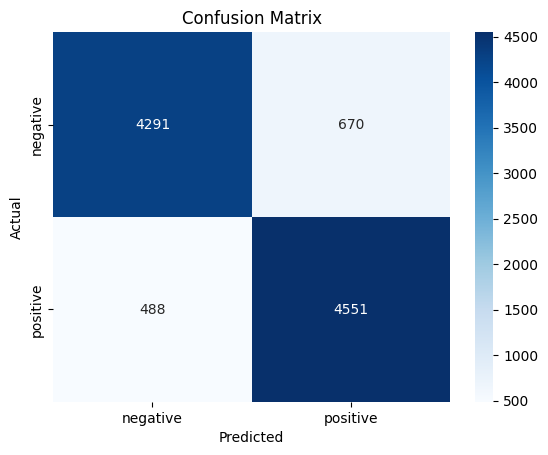

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# 情感标签编码
encoder = LabelEncoder()
IMDB_data['sentiment_encoded'] = encoder.fit_transform(IMDB_data['sentiment'])
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 1), stop_words='english')
Y = tfidf.fit_transform(IMDB_data['cleaned_review'])
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(Y, IMDB_data['sentiment_encoded'], test_size=0.2, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 输出分类报告
print(classification_report(y_test, y_pred))

# 输出混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
